## CX Calibration with HPO

#### Imports

In [1]:
import sys
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(os.path.join('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control'))
if module_path not in sys.path:
    sys.path.append(module_path)

from template_configurations import gate_q_env_config
from quantumenvironment import QuantumEnvironment
from hyperparameter_optimization import HyperparameterOptimizer
from gymnasium.wrappers import RescaleAction, ClipAction

import logging
logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s", # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag experiments done for qubit 1 done.
All single qubit calibrations are done
Updated Instruction Schedule Map <InstructionScheduleMap(1Q instructions:
  q0: {'t', 'x', 'measure', 'rz', 's', 'sdg', 'id', 'delay', 'sx', 'h', 'reset', 'tdg', 'z'}
  q1: {'t', 'x', 'measure', 'rz', 's', 'sdg', 'id', 'delay', 'sx', 'h', 'reset', 'tdg', 'z'}
Multi qubit instructions:
  (0, 1): {'cr45m', 'ecr', 'cr45p'}
  (1, 0): {'cr45m', 'ecr', 'cr45p'}
)>


Which gate is to be calibrated?

In [2]:
gate_q_env_config.target

{'register': [0, 1],
 'gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])}

### Perform HPO

Set path to the files specifying the RL agent and where to store the HPO results

In [3]:
current_dir = os.getcwd()

path_agent_config = os.path.join(os.path.dirname(current_dir), 'agent_config.yaml')
path_hpo_config = os.path.join(current_dir, 'config_yamls', 'hpo_config.yaml')
save_results_path = 'hpo_results'

#### Create the QuantumEnvironment, clip and rescale the action space

In [4]:
# Define the original action space
print('Initial loower bounds:', gate_q_env_config.action_space.low)
print('Initial upper bounds:', gate_q_env_config.action_space.high)

q_env = QuantumEnvironment(gate_q_env_config)

# Apply the RescaleAction wrapper
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, min_action=-1.0, max_action=1.0)

# Confirm the rescale box dimensions
print('Rescaled lower bounds:', q_env.action_space.low)
print('Rescaled upper bounds:', q_env.action_space.high)

Initial loower bounds: [-3.14 -3.14 -3.14 -3.14 -3.14 -3.14 -3.14]
Initial upper bounds: [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
Rescaled lower bounds: [-1. -1. -1. -1. -1. -1. -1.]
Rescaled upper bounds: [1. 1. 1. 1. 1. 1. 1.]


In [5]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config, 
    save_results_path=save_results_path, 
    log_progress=True,
)
best_trial = optimizer.optimize_hyperparameters(num_hpo_trials=2)

 92%|█████████▏| 200/218 [10:11<00:20,  1.12s/it]

Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764, 0.3323651683000779, 0.3259186619759614, 0.3425309369393338, 0.31385715455364305, 0.3375974081745714, 0.3229144759150375, 0.33886981610836825, 0.3888220122149947, 0.3287011035177273, 0.37584603543750045, 0.34525715269495005, 0.34825531765212625, 0.380508487278424, 0.4588110845561665, 0.41993541930166567, 0.

 92%|█████████▏| 201/218 [10:12<00:17,  1.03s/it]

mean tensor([ 0.0021, -0.2183, -0.2531, -0.4902, -0.5726,  0.5255,  0.5022])
Average return: 0.9832016262283394
DFE Rewards Mean: 0.9832016262283394
DFE Rewards standard dev 0.015552338927640914
Returns Mean: 5.4418554
Returns standard dev 3.3758984
Advantages Mean: -1.2450953
Advantages standard dev 3.3758984
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328

 93%|█████████▎| 202/218 [10:13<00:15,  1.04it/s]

mean tensor([ 0.0030, -0.2129, -0.2502, -0.4817, -0.5651,  0.5208,  0.4923])
Average return: 0.9850747973689642
DFE Rewards Mean: 0.9850747973689642
DFE Rewards standard dev 0.016043640931647483
Returns Mean: 5.8463717
Returns standard dev 3.7289057
Advantages Mean: -0.5981628
Advantages standard dev 3.7289057
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328

 93%|█████████▎| 203/218 [10:14<00:13,  1.10it/s]

mean tensor([-0.0014, -0.1840, -0.2320, -0.4433, -0.5305,  0.4936,  0.4479])
Average return: 0.9675454883132655
DFE Rewards Mean: 0.9675454883132655
DFE Rewards standard dev 0.023294330651787237
Returns Mean: 4.4172416
Returns standard dev 2.996865
Advantages Mean: -1.632189
Advantages standard dev 2.996865
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764

 94%|█████████▎| 204/218 [10:14<00:12,  1.14it/s]

mean tensor([ 0.0085, -0.2384, -0.2615, -0.5140, -0.5915,  0.5430,  0.5291])
Average return: 0.975663522125311
DFE Rewards Mean: 0.975663522125311
DFE Rewards standard dev 0.01986723021507827
Returns Mean: 4.7981243
Returns standard dev 3.07693
Advantages Mean: -1.3619018
Advantages standard dev 3.07693
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764, 0.

 94%|█████████▍| 205/218 [10:15<00:11,  1.12it/s]

mean tensor([ 0.0056, -0.2231, -0.2521, -0.5001, -0.5788,  0.5337,  0.5123])
Average return: 0.9940336903664342
DFE Rewards Mean: 0.9940336903664342
DFE Rewards standard dev 0.009848958220215974
Returns Mean: 7.3123894
Returns standard dev 4.0260468
Advantages Mean: 1.4043117
Advantages standard dev 4.0260468
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.318685304503287

 94%|█████████▍| 206/218 [10:16<00:10,  1.15it/s]

mean tensor([ 0.0066, -0.2380, -0.2577, -0.5146, -0.5915,  0.5440,  0.5272])
Average return: 0.9761337263171546
DFE Rewards Mean: 0.9761337263171546
DFE Rewards standard dev 0.01907532787625738
Returns Mean: 4.8352666
Returns standard dev 3.1013734
Advantages Mean: -1.3312835
Advantages standard dev 3.1013737
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.318685304503287

 95%|█████████▍| 207/218 [10:17<00:09,  1.18it/s]

mean tensor([ 0.0076, -0.2399, -0.2580, -0.5132, -0.5916,  0.5441,  0.5274])
Average return: 0.9774645520880154
DFE Rewards Mean: 0.9774645520880154
DFE Rewards standard dev 0.018870881527251
Returns Mean: 5.009287
Returns standard dev 3.2903807
Advantages Mean: -0.9570593
Advantages standard dev 3.2903807
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764,

 95%|█████████▌| 208/218 [10:18<00:08,  1.20it/s]

mean tensor([-0.0035, -0.1803, -0.2273, -0.4435, -0.5305,  0.4962,  0.4473])
Average return: 0.9704991431246801
DFE Rewards Mean: 0.9704991431246801
DFE Rewards standard dev 0.02506095580924099
Returns Mean: 4.916833
Returns standard dev 3.5398426
Advantages Mean: -0.60696346
Advantages standard dev 3.5398426
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.318685304503287

 96%|█████████▌| 209/218 [10:19<00:07,  1.21it/s]

mean tensor([ 0.0014, -0.2158, -0.2482, -0.4913, -0.5735,  0.5307,  0.5026])
Average return: 0.9796403210532207
DFE Rewards Mean: 0.9796403210532207
DFE Rewards standard dev 0.018038289296436322
Returns Mean: 5.119814
Returns standard dev 3.230158
Advantages Mean: -0.36148992
Advantages standard dev 3.2301579
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.318685304503287

 96%|█████████▋| 210/218 [10:20<00:06,  1.16it/s]

mean tensor([ 3.2350e-04, -2.0959e-01, -2.4491e-01, -4.8290e-01, -5.6548e-01,
         5.2455e-01,  4.9303e-01])
Average return: 0.9819279442125188
DFE Rewards Mean: 0.9819279442125188
DFE Rewards standard dev 0.019963182846321592
Returns Mean: 5.844366
Returns standard dev 3.9169154
Advantages Mean: 0.58331776
Advantages standard dev 3.9169154
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0

 97%|█████████▋| 211/218 [10:20<00:05,  1.18it/s]

mean tensor([-0.0055, -0.1644, -0.2177, -0.4202, -0.5098,  0.4795,  0.4188])
Average return: 0.9971109478767333
DFE Rewards Mean: 0.9971109478767333
DFE Rewards standard dev 0.005905965205660006
Returns Mean: 8.214623
Returns standard dev 3.9434712
Advantages Mean: 2.9697828
Advantages standard dev 3.9434712
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.3186853045032876

 97%|█████████▋| 212/218 [10:21<00:04,  1.21it/s]

mean tensor([-0.0017, -0.1937, -0.2372, -0.4643, -0.5498,  0.5119,  0.4712])
Average return: 0.9886627720571908
DFE Rewards Mean: 0.9886627720571908
DFE Rewards standard dev 0.014935624576564855
Returns Mean: 6.646676
Returns standard dev 4.134066
Advantages Mean: 1.0188959
Advantages standard dev 4.134066
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764,

 98%|█████████▊| 213/218 [10:22<00:04,  1.22it/s]

mean tensor([-0.0052, -0.1721, -0.2222, -0.4338, -0.5222,  0.4894,  0.4328])
Average return: 0.9542488416489487
DFE Rewards Mean: 0.9542488416489487
DFE Rewards standard dev 0.028851171069745808
Returns Mean: 3.7857413
Returns standard dev 2.5004222
Advantages Mean: -1.9015031
Advantages standard dev 2.5004222
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328

 98%|█████████▊| 214/218 [10:23<00:03,  1.23it/s]

mean tensor([-0.0056, -0.1662, -0.2143, -0.4230, -0.5096,  0.4804,  0.4209])
Average return: 0.9976177738360382
DFE Rewards Mean: 0.9976177738360382
DFE Rewards standard dev 0.006791181198893288
Returns Mean: 8.731577
Returns standard dev 4.0825615
Advantages Mean: 3.295143
Advantages standard dev 4.0825615
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764

 99%|█████████▊| 215/218 [10:23<00:02,  1.24it/s]

mean tensor([-0.0062, -0.1599, -0.2104, -0.4092, -0.4986,  0.4723,  0.4061])
Average return: 0.9966489183106302
DFE Rewards Mean: 0.9966489183106302
DFE Rewards standard dev 0.007158539756142869
Returns Mean: 8.2093
Returns standard dev 4.004653
Advantages Mean: 2.6295419
Advantages standard dev 4.004653
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764, 0

 99%|█████████▉| 216/218 [10:24<00:01,  1.18it/s]

mean tensor([ 0.0080, -0.2564, -0.2617, -0.5292, -0.6004,  0.5545,  0.5422])
Average return: 0.9842500402763839
DFE Rewards Mean: 0.9842500402763839
DFE Rewards standard dev 0.01572205667479346
Returns Mean: 5.617153
Returns standard dev 3.5319977
Advantages Mean: -0.68212414
Advantages standard dev 3.5319977
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.318685304503287

100%|█████████▉| 217/218 [10:25<00:00,  1.20it/s]

mean tensor([ 0.0021, -0.2222, -0.2490, -0.4953, -0.5704,  0.5315,  0.5030])
Average return: 0.9826832302590321
DFE Rewards Mean: 0.9826832302590321
DFE Rewards standard dev 0.01762696497221011
Returns Mean: 5.578643
Returns standard dev 3.586698
Advantages Mean: -0.40602976
Advantages standard dev 3.586698
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764

100%|██████████| 218/218 [10:26<00:00,  2.87s/it]
[I 2024-01-27 14:00:23,660] Trial 1 finished with value: 0.9280085740619817 and parameters: {'N_UPDATES': 218, 'N_EPOCHS': 128, 'MINIBATCH_SIZE': 128, 'BATCHSIZE_MULTIPLIER': 4, 'LR': 7.62543755947612e-05, 'GAMMA': 0.9674210832840373, 'GAE_LAMBDA': 0.9378996922087948, 'ENT_COEF': 0.00016338695079697762, 'V_COEF': 0.378587710190792, 'GRADIENT_CLIP': 0.21609118910164912, 'CLIP_VALUE_COEF': 0.1995673055208279, 'CLIP_RATIO': 0.19485422195585764}. Best is trial 1 with value: 0.9280085740619817.


mean tensor([ 0.0042, -0.2311, -0.2506, -0.5028, -0.5763,  0.5357,  0.5123])
Average return: 0.994662501600076
DFE Rewards Mean: 0.994662501600076
DFE Rewards standard dev 0.009849529539999433
Returns Mean: 7.6441555
Returns standard dev 4.158767
Advantages Mean: 1.8346553
Advantages standard dev 4.158767
Fidelity History: [0.2626856740277781, 0.27551778560730744, 0.27839579793823555, 0.26463198586816983, 0.28351155238021586, 0.27627350343171697, 0.29612159748515987, 0.3016810256086524, 0.27979841476159406, 0.29301030016023655, 0.2991917193562264, 0.291029182583526, 0.29803467941694595, 0.2960923887483039, 0.3008147329180109, 0.29698567580613366, 0.3014776040359498, 0.3073579299316075, 0.300381674964005, 0.30904311041944377, 0.2982312995419341, 0.3154540515226565, 0.3219061423065964, 0.31629449948315547, 0.31640038735972875, 0.31854027305097776, 0.3264680450279929, 0.3305551045787395, 0.30973477937242416, 0.3185269033875434, 0.3163403731378752, 0.3308335362181771, 0.31868530450328764, 

#### Quick Summary of HPO Task

In [6]:
optimizer.target_gate

{'target_gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 'target_register': [0, 1]}

In [7]:
optimizer.hyperparams

['N_UPDATES',
 'N_EPOCHS',
 'MINIBATCH_SIZE',
 'BATCHSIZE_MULTIPLIER',
 'LR',
 'GAMMA',
 'GAE_LAMBDA',
 'ENT_COEF',
 'V_COEF',
 'GRADIENT_CLIP',
 'CLIP_VALUE_COEF',
 'CLIP_RATIO',
 'BATCHSIZE']

In [8]:
optimizer.num_hpo_trials

2

In [9]:
optimizer.best_hpo_configuration

{'best_avg_reward': 0.9280085740619817,
 'best_hyperparams': {'N_UPDATES': 218,
  'N_EPOCHS': 128,
  'MINIBATCH_SIZE': 128,
  'BATCHSIZE_MULTIPLIER': 4,
  'LR': 7.62543755947612e-05,
  'GAMMA': 0.9674210832840373,
  'GAE_LAMBDA': 0.9378996922087948,
  'ENT_COEF': 0.00016338695079697762,
  'V_COEF': 0.378587710190792,
  'GRADIENT_CLIP': 0.21609118910164912,
  'CLIP_VALUE_COEF': 0.1995673055208279,
  'CLIP_RATIO': 0.19485422195585764}}

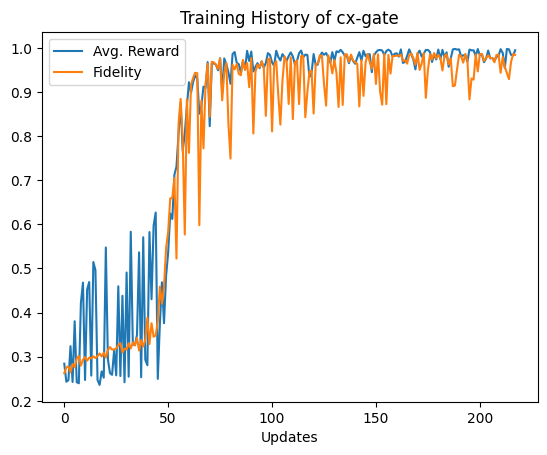

In [10]:
plt.plot(best_trial['avg_reward'], label='Avg. Reward')
plt.plot(best_trial['fidelity_history'], label='Fidelity')
plt.xlabel('Updates')
plt.title(f'Training History of {gate_q_env_config.target["gate"].name}-gate')
plt.legend()